**Tools - pandas**

*The `pandas` library provides high-performance, easy-to-use data structures and data analysis tools. The main data structure is the `DataFrame`, which you can think of as an in-memory 2D table (like a spreadsheet, with column names and row labels). Many features available in Excel are available programmatically, such as creating pivot tables, computing columns based on other columns, plotting graphs, etc. You can also group rows by column value, or join tables much like in SQL. Pandas is also great at handling time series.*

Prerequisites:
* NumPy – if you are not familiar with NumPy, we recommend that you go through the [NumPy tutorial](tools_numpy.ipynb) now.
# Setup
First, let's make sure this notebook works well in both python 2 and 3:

In [1]:
from __future__ import division, print_function, unicode_literals

Now let's import `pandas`. People usually import it as `pd`:

In [2]:
import pandas as pd

# `Series` objects
The `pandas` library contains these useful data structures:
* `Series` objects, that we will discuss now. A `Series` object is 1D array, similar to a column in a spreadsheet (with a column name and row labels).
* `DataFrame` objects. This is a 2D table, similar to a spreadsheet (with column names and row labels).
* `Panel` objects. You can see a `Panel` as a dictionary of `DataFrame`s. These are less used, so we will not discuss them here.
## Creating a `Series`
Let's start by creating our first `Series` object!

In [4]:
s = pd.Series([2, -1 ,3 ,5])
s

0    2
1   -1
2    3
3    5
dtype: int64

## Similar to a 1D `ndarray`
`Series` objects behave much like one-dimensional NumPy `ndarray`s, and you can often pass them as parameters to NumPy functions:

In [5]:
import numpy as np
np.exp(s)

0      7.389056
1      0.367879
2     20.085537
3    148.413159
dtype: float64

Arithmetic operations on `Series` are also possible, and they apply *elementwise*, just like for `ndarray`s:

In [6]:
s + [1000, 2000, 3000, 4000]

0    1002
1    1999
2    3003
3    4005
dtype: int64

Similar to NumPy, if you add a single number to a `Series`, that number is added to all items in the `Series`. This is called * broadcasting*:`

In [7]:
s + 1000

0    1002
1     999
2    1003
3    1005
dtype: int64

The same is true for all binary operations such as `*` or `/`, and even conditional operations:

In [8]:
s < 0

0    False
1     True
2    False
3    False
dtype: bool

## Index labels
Each item in a `Series` object has a unique identifier called the *index label*. By default, it is simply the rank of the item in the `Series` (starting at `0`) but you can also set the index labels manually:

In [9]:
s2 = pd.Series([68, 83, 112, 68], index=['alice', 'bob', 'charles', 'darwin'])
s2

alice       68
bob         83
charles    112
darwin      68
dtype: int64

You can then use the `Series` just like a `dict`:

In [10]:
s2['bob']

83

You can still access the items by integer location, like in a regular array:

In [11]:
s2[1]

83

To make it clear when you are accessing by label or by integer location, it is recommended to always use the `loc` attribute when accessing by label, and the `iloc` attribute when accessing by integer location:

In [12]:
s2.loc['bob']

83

In [13]:
s2.iloc[1]

83

Slicing a `Series` also slices the index labels:

In [14]:
s2.iloc[1:3]

bob         83
charles    112
dtype: int64

This can lead to unexpected results when using the default numeric labels, so be careful:

In [15]:
surprise = pd.Series([1000, 1001, 1002, 1003])
surprise

0    1000
1    1001
2    1002
3    1003
dtype: int64

In [16]:
surprise_slice = surprise[2:]
surprise_slice

2    1002
3    1003
dtype: int64

Oh look! The first element has index label `2`. The element with index label `0` is absent from the slice:

In [17]:
try:
    surprise_slice[0]
except KeyError as e:
    print('Key error:', e)

Key error: 0


But remember that you can access elements by integer location using the `iloc` attribute. This illustrates another reason why it's always better to use `loc` and `iloc` to access `Series` objects:

In [19]:
surprise_slice.iloc[0]

1002

## Init from `dict`
You can create a `Series` object from a `dict`. The keys will be used as index labels:

In [20]:
weights = {'alice': 68, 'bob': 83, 'colin': 86, 'darwin': 68}
s3 = pd.Series(weights)
s3

alice     68
bob       83
colin     86
darwin    68
dtype: int64

You can control which elements you want to include in the `Series` and in what order by explicitly specifying the desired `index`:

In [21]:
s4 = pd.Series(weights, index=['colin', 'alice'])
s4

colin    86
alice    68
dtype: int64

## Automatic alignment
When an operation involves multiple `Series` objects, `pandas` automatically aligns items by matching index labels.

In [22]:
print(s2.keys())
print(s3.keys())
s2 + s3

Index(['alice', 'bob', 'charles', 'darwin'], dtype='object')
Index(['alice', 'bob', 'colin', 'darwin'], dtype='object')


alice      136.0
bob        166.0
charles      NaN
colin        NaN
darwin     136.0
dtype: float64

The resulting `Series` contains the union of index labels from `s2` and `s3`. Since `"colin"` is missing from `s2` and `"charles"` is missing from `s3`, these items have a `NaN` result value. (ie. Not-a-Number means *missing*).

Automatic alignment is very handy when working with data that may come from various sources with varying structure and missing items. But if you forget to set the right index labels, you can have surprising results:

In [24]:
s5 = pd.Series([1000, 2000, 3000, 4000])
print('s2 =', s2.values)
print('s5 =', s5.values)
s2 + s5

s2 = [ 68  83 112  68]
s5 = [1000 2000 3000 4000]


alice     NaN
bob       NaN
charles   NaN
darwin    NaN
0         NaN
1         NaN
2         NaN
3         NaN
dtype: float64

Pandas could not align the `Series`, since their labels do not match at all, hence the full `NaN` result.

## Init with a scalar
You can also initialize a `Series` object using a scalar and a list of index labels: all items will be set to the scalar.

In [25]:
meaning = pd.Series(42, ['life', 'universe', 'everything'])
meaning

life          42
universe      42
everything    42
dtype: int64

## `Series` name
A `Series` can have a `name`:

In [26]:
s6 = pd.Series([83, 68], index=['bob', 'alice'], name='weight')
s6

bob      83
alice    68
Name: weight, dtype: int64

## Plotting a `Series`
Pandas makes it easy to plot `Series` data using matplotlib (for more details on matplotlib, check out the [matplotlib tutorial](tools_matplotlib.ipynb)). Just import matplotlib and call the `plot()` method:

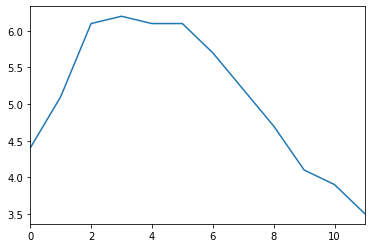

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
temperatures = [4.4,5.1,6.1,6.2,6.1,6.1,5.7,5.2,4.7,4.1,3.9,3.5]
s7 = pd.Series(temperatures, name='Temperature')
s7.plot()
plt.show()

There are *many* options for plotting your data. It is not necessary to list them all here: if you need a particular type of plot (histograms, pie charts, etc.), just look for it in the excellent [Visualization](http://pandas.pydata.org/pandas-docs/stable/visualization.html) section of pandas' documentation, and look at the example code.
# Handling time
Many datasets have timestamps, and pandas is awesome at manipulating such data:
* it can represent periods (such as 2016Q3) and frequencies (such as "monthly"),
* it can convert periods to actual timestamps, and *vice versa*,
* it can resample data and aggregate values any way you like,
* it can handle timezones.

## Time range
Let's start by creating a time series using `pd.date_range()`. This returns a `DatetimeIndex` containing one datetime per hour for 12 hours starting on October 29th 2016 at 5:30pm.

In [28]:
dates = pd.date_range('2016/10/29 5:30pm', periods=12, freq='H')
dates

DatetimeIndex(['2016-10-29 17:30:00', '2016-10-29 18:30:00',
               '2016-10-29 19:30:00', '2016-10-29 20:30:00',
               '2016-10-29 21:30:00', '2016-10-29 22:30:00',
               '2016-10-29 23:30:00', '2016-10-30 00:30:00',
               '2016-10-30 01:30:00', '2016-10-30 02:30:00',
               '2016-10-30 03:30:00', '2016-10-30 04:30:00'],
              dtype='datetime64[ns]', freq='H')

This `DatetimeIndex` may be used as an index in a `Series`:

In [29]:
temp_series = pd.Series(temperatures, dates)
temp_series

2016-10-29 17:30:00    4.4
2016-10-29 18:30:00    5.1
2016-10-29 19:30:00    6.1
2016-10-29 20:30:00    6.2
2016-10-29 21:30:00    6.1
2016-10-29 22:30:00    6.1
2016-10-29 23:30:00    5.7
2016-10-30 00:30:00    5.2
2016-10-30 01:30:00    4.7
2016-10-30 02:30:00    4.1
2016-10-30 03:30:00    3.9
2016-10-30 04:30:00    3.5
Freq: H, dtype: float64

Let's plot this series:

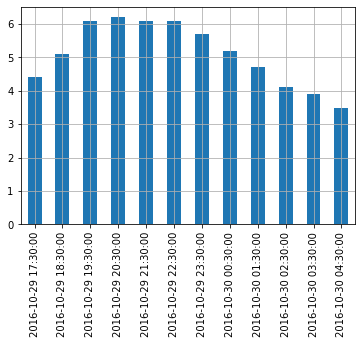

In [30]:
temp_series.plot(kind='bar')
plt.grid(True)
plt.show()

## Resampling
Pandas lets us resample a time series very simply. Just call the `resample()` method and specify a new frequency:

In [32]:
temp_series_freq_2H = temp_series.resample("2H")
temp_series_freq_2H

The resampling operation is actually a deferred operation, which is why we did not get a `Series` object, but a `DatetimeIndexResampler` object instead. To actually perform the resampling operation, we can simply call the `mean()` method: Pandas will compute the mean of every pair of consecutive hours:

In [33]:
temp_series_freq_2H = temp_series_freq_2H.mean()

Let's plot the result:

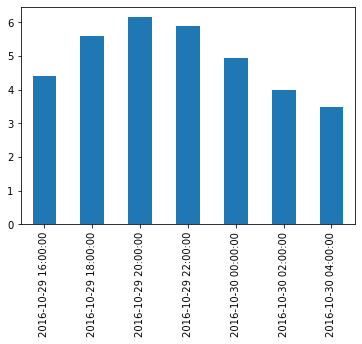

In [34]:
temp_series_freq_2H.plot(kind='bar')
plt.show()

Note how the values have automatically been aggregated into 2-hour periods. If we look at the 6-8pm period, for example, we had a value of `5.1` at 6:30pm, and `6.1` at 7:30pm. After resampling, we just have one value of `5.6`, which is the mean of `5.1` and `6.1`. Rather than computing the mean, we could have used any other aggregation function, for example we can decide to keep the minimum value of each period:

In [35]:
temp_series_freq_2H = temp_series.resample('2H').min()
temp_series_freq_2H

2016-10-29 16:00:00    4.4
2016-10-29 18:00:00    5.1
2016-10-29 20:00:00    6.1
2016-10-29 22:00:00    5.7
2016-10-30 00:00:00    4.7
2016-10-30 02:00:00    3.9
2016-10-30 04:00:00    3.5
Freq: 2H, dtype: float64

Or, equivalently, we could use the `apply()` method instead:

In [36]:
temp_series_freq_2H = temp_series.resample('2H').apply(np.min)
temp_series_freq_2H

2016-10-29 16:00:00    4.4
2016-10-29 18:00:00    5.1
2016-10-29 20:00:00    6.1
2016-10-29 22:00:00    5.7
2016-10-30 00:00:00    4.7
2016-10-30 02:00:00    3.9
2016-10-30 04:00:00    3.5
Freq: 2H, dtype: float64

## Upsampling and interpolation
This was an example of downsampling. We can also upsample (ie. increase the frequency), but this creates holes in our data:

In [37]:
temp_series_freq_15min = temp_series.resample('15Min').mean()
temp_series_freq_15min.head(n=10)   # 'head' display the top n values

2016-10-29 17:30:00    4.4
2016-10-29 17:45:00    NaN
2016-10-29 18:00:00    NaN
2016-10-29 18:15:00    NaN
2016-10-29 18:30:00    5.1
2016-10-29 18:45:00    NaN
2016-10-29 19:00:00    NaN
2016-10-29 19:15:00    NaN
2016-10-29 19:30:00    6.1
2016-10-29 19:45:00    NaN
Freq: 15T, dtype: float64

One solution is to fill the gaps by interpolating. We just call the `interpolate()` method. The default is to use linear interpolation, but we can also select another method, such as cubic interpolation:

In [38]:
temp_series_freq_15min = temp_series.resample('15Min').interpolate(method='cubic')
temp_series_freq_15min.head(n=10)

2016-10-29 17:30:00    4.400000
2016-10-29 17:45:00    4.452911
2016-10-29 18:00:00    4.605113
2016-10-29 18:15:00    4.829758
2016-10-29 18:30:00    5.100000
2016-10-29 18:45:00    5.388992
2016-10-29 19:00:00    5.669887
2016-10-29 19:15:00    5.915839
2016-10-29 19:30:00    6.100000
2016-10-29 19:45:00    6.203621
Freq: 15T, dtype: float64

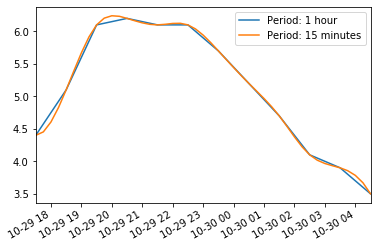

In [39]:
temp_series.plot(label='Period: 1 hour')
temp_series_freq_15min.plot(label='Period: 15 minutes')
plt.legend()
plt.show()

## Timezones
By default datetimes are *naive*: they are not aware of timezones, so 2016-10-30 02:30 might mean October 30th 2016 at 2:30am in Paris or in New York. We can make datetimes timezone *aware* by calling the `tz_localize()` method:

In [40]:
temp_series_ny = temp_series.tz_localize('America/New_York')
temp_series_ny

2016-10-29 17:30:00-04:00    4.4
2016-10-29 18:30:00-04:00    5.1
2016-10-29 19:30:00-04:00    6.1
2016-10-29 20:30:00-04:00    6.2
2016-10-29 21:30:00-04:00    6.1
2016-10-29 22:30:00-04:00    6.1
2016-10-29 23:30:00-04:00    5.7
2016-10-30 00:30:00-04:00    5.2
2016-10-30 01:30:00-04:00    4.7
2016-10-30 02:30:00-04:00    4.1
2016-10-30 03:30:00-04:00    3.9
2016-10-30 04:30:00-04:00    3.5
Freq: H, dtype: float64

Note that `-04:00` is now appended to all the datetimes. This means that these datetimes refer to [UTC](https://en.wikipedia.org/wiki/Coordinated_Universal_Time) - 4 hours.

We can convert these datetimes to Paris time like this:

In [41]:
temp_series_paris = temp_series_ny.tz_convert('Europe/Paris')
temp_series_paris

2016-10-29 23:30:00+02:00    4.4
2016-10-30 00:30:00+02:00    5.1
2016-10-30 01:30:00+02:00    6.1
2016-10-30 02:30:00+02:00    6.2
2016-10-30 02:30:00+01:00    6.1
2016-10-30 03:30:00+01:00    6.1
2016-10-30 04:30:00+01:00    5.7
2016-10-30 05:30:00+01:00    5.2
2016-10-30 06:30:00+01:00    4.7
2016-10-30 07:30:00+01:00    4.1
2016-10-30 08:30:00+01:00    3.9
2016-10-30 09:30:00+01:00    3.5
Freq: H, dtype: float64

You may have noticed that the UTC offset changes from `+02:00` to `+01:00`: this is because France switches to winter time at 3am that particular night (time goes back to 2am). Notice that 2:30am occurs twice! Let's go back to a naive representation (if you log some data hourly using local time, without storing the timezone, you might get something like this):

In [42]:
temp_series_paris_naive = temp_series_paris.tz_localize(None)
temp_series_paris_naive

2016-10-29 23:30:00    4.4
2016-10-30 00:30:00    5.1
2016-10-30 01:30:00    6.1
2016-10-30 02:30:00    6.2
2016-10-30 02:30:00    6.1
2016-10-30 03:30:00    6.1
2016-10-30 04:30:00    5.7
2016-10-30 05:30:00    5.2
2016-10-30 06:30:00    4.7
2016-10-30 07:30:00    4.1
2016-10-30 08:30:00    3.9
2016-10-30 09:30:00    3.5
Freq: H, dtype: float64

Now `02:30` is really ambiguous. If we try to localize these naive datetimes to the Paris timezone, we get an error:

In [43]:
try:
    temp_series_paris_naive.tz_localize('Europe/Paris')
except Exception as e:
    print(type(e))
    print(e)

<class 'pytz.exceptions.AmbiguousTimeError'>
Cannot infer dst time from %r, try using the 'ambiguous' argument


Fortunately using the `ambiguous` argument we can tell pandas to infer the right DST (Daylight Saving Time) based on the order of the ambiguous timestamps:

In [45]:
temp_series_paris_naive.tz_localize('Europe/Paris', ambiguous='infer')

2016-10-29 23:30:00+02:00    4.4
2016-10-30 00:30:00+02:00    5.1
2016-10-30 01:30:00+02:00    6.1
2016-10-30 02:30:00+02:00    6.2
2016-10-30 02:30:00+01:00    6.1
2016-10-30 03:30:00+01:00    6.1
2016-10-30 04:30:00+01:00    5.7
2016-10-30 05:30:00+01:00    5.2
2016-10-30 06:30:00+01:00    4.7
2016-10-30 07:30:00+01:00    4.1
2016-10-30 08:30:00+01:00    3.9
2016-10-30 09:30:00+01:00    3.5
Freq: H, dtype: float64

## Periods
The `pd.period_range()` function returns a `PeriodIndex` instead of a `DatetimeIndex`. For example, let's get all quarters in 2016 and 2017:

In [47]:
quarters = pd.period_range('2016Q1', periods=8, freq='Q')
quarters

PeriodIndex(['2016Q1', '2016Q2', '2016Q3', '2016Q4', '2017Q1', '2017Q2',
             '2017Q3', '2017Q4'],
            dtype='period[Q-DEC]', freq='Q-DEC')

Adding a number `N` to a `PeriodIndex` shifts the periods by `N` times the `PeriodIndex`'s frequency:

In [48]:
quarters + 3

PeriodIndex(['2016Q4', '2017Q1', '2017Q2', '2017Q3', '2017Q4', '2018Q1',
             '2018Q2', '2018Q3'],
            dtype='period[Q-DEC]', freq='Q-DEC')

The `asfreq()` method lets us change the frequency of the `PeriodIndex`. All periods are lengthened or shortened accordingly. For example, let's convert all the quarterly periods to monthly periods (zooming in):

In [49]:
quarters.asfreq('M')

PeriodIndex(['2016-03', '2016-06', '2016-09', '2016-12', '2017-03', '2017-06',
             '2017-09', '2017-12'],
            dtype='period[M]', freq='M')

By default, the `asfreq` zooms on the end of each period. We can tell it to zoom on the start of each period instead:

In [50]:
quarters.asfreq('M', how='start')

PeriodIndex(['2016-01', '2016-04', '2016-07', '2016-10', '2017-01', '2017-04',
             '2017-07', '2017-10'],
            dtype='period[M]', freq='M')

And we can zoom out:

In [51]:
quarters.asfreq('A')

PeriodIndex(['2016', '2016', '2016', '2016', '2017', '2017', '2017', '2017'], dtype='period[A-DEC]', freq='A-DEC')

Of course we can create a `Series` with a `PeriodIndex`:

In [52]:
quarterly_revenue = pd.Series([300, 320, 290, 390, 320, 360, 310, 410], index=quarters)
quarterly_revenue

2016Q1    300
2016Q2    320
2016Q3    290
2016Q4    390
2017Q1    320
2017Q2    360
2017Q3    310
2017Q4    410
Freq: Q-DEC, dtype: int64

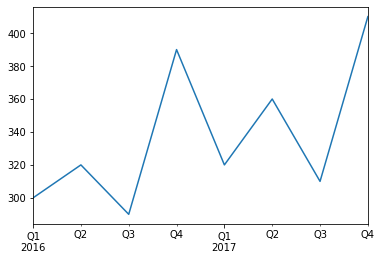

In [53]:
quarterly_revenue.plot(kind='line')
plt.show()

We can convert periods to timestamps by calling `to_timestamp`. By default this will give us the first day of each period, but by setting `how` and `freq`, we can get the last hour of each period:

In [54]:
last_hours = quarterly_revenue.to_timestamp(how='end', freq='H')
last_hours

2016-03-31 23:59:59.999999999    300
2016-06-30 23:59:59.999999999    320
2016-09-30 23:59:59.999999999    290
2016-12-31 23:59:59.999999999    390
2017-03-31 23:59:59.999999999    320
2017-06-30 23:59:59.999999999    360
2017-09-30 23:59:59.999999999    310
2017-12-31 23:59:59.999999999    410
Freq: Q-DEC, dtype: int64

And back to periods by calling `to_period`:

In [55]:
last_hours.to_period()

2016Q1    300
2016Q2    320
2016Q3    290
2016Q4    390
2017Q1    320
2017Q2    360
2017Q3    310
2017Q4    410
Freq: Q-DEC, dtype: int64

Pandas also provides many other time-related functions that we recommend you check out in the [documentation](http://pandas.pydata.org/pandas-docs/stable/timeseries.html). To whet your appetite, here is one way to get the last business day of each month in 2016, at 9am:

In [56]:
months_2016 = pd.period_range('2016', periods=12, freq='M')
one_day_after_last_days = months_2016.asfreq('D') + 1
last_bdays = one_day_after_last_days.to_timestamp() - pd.tseries.offsets.BDay()
last_bdays.to_period('H') + 9

PeriodIndex(['2016-01-29 09:00', '2016-02-29 09:00', '2016-03-31 09:00',
             '2016-04-29 09:00', '2016-05-31 09:00', '2016-06-30 09:00',
             '2016-07-29 09:00', '2016-08-31 09:00', '2016-09-30 09:00',
             '2016-10-31 09:00', '2016-11-30 09:00', '2016-12-30 09:00'],
            dtype='period[H]', freq='H')

# `DataFrame` objects
A DataFrame object represents a spreadsheet, with cell values, column names and row index labels. You can define expressions to compute columns based on other columns, create pivot-tables, group rows, draw graphs, etc. You can see `DataFrame`s as dictionaries of `Series`.

## Creating a `DataFrame`
You can create a DataFrame by passing a dictionary of `Series` objects:

In [57]:
people_dict = {
    "weight": pd.Series([68, 83, 112], index=["alice", "bob", "charles"]),
    "birthyear": pd.Series([1984, 1985, 1992], index=["bob", "alice", "charles"]),
    "children": pd.Series([0, 3], index=["charles", 'bob']),
    "hobby": pd.Series(["Biking", "Dancing"], index=["alice", "bob"])
}
people = pd.DataFrame(people_dict)
people

weight  birthyear  children    hobby
alice        68       1985       NaN   Biking
bob          83       1984       3.0  Dancing
charles     112       1992       0.0      NaN

A few things to note:
* the `Series` were automatically aligned based on their index,
* missing values are represented as `NaN`,
* `Series` names are ignored (the name `"year"` was dropped),
* `DataFrame`s are displayed nicely in Jupyter notebooks, woohoo!

You can access columns pretty much as you would expect. They are returned as `Series` objects:

In [59]:
people["birthyear"]

alice      1985
bob        1984
charles    1992
Name: birthyear, dtype: int64

You can also get multiple columns at once:

In [60]:
people[["birthyear", 'hobby']]

birthyear    hobby
alice         1985   Biking
bob           1984  Dancing
charles       1992      NaN

If you pass a list of columns and/or index row labels to the `DataFrame` constructor, it will guarantee that these columns and/or rows will exist, in that order, and no other column/row will exist. For example:

In [62]:
d2 = pd.DataFrame(
        people_dict,
        columns=["birthyear", "weight", "height"],
        index=["bob", "alice", "eugene"]
        )
d2

birthyear  weight height
bob        1984.0    83.0    NaN
alice      1985.0    68.0    NaN
eugene        NaN     NaN    NaN

Another convenient way to create a `DataFrame` is to pass all the values to the constructor as an `ndarray`, or a list of lists, and specify the column names and row index labels separately:

In [64]:
values = [
            [1985, np.nan, "Biking",  68],
            [1984, 3,      "Dancing", 83],
            [1992, 0,      np.nan,    112]
         ]
d3 = pd.DataFrame(
        values,
        columns=["birthyear", "children", "hobby", "weight"],
        index=["alice", "bob", "charles"]
        )
d3

birthyear  children    hobby  weight
alice         1985       NaN   Biking      68
bob           1984       3.0  Dancing      83
charles       1992       0.0      NaN     112

To specify missing values, you can either use `np.nan` or NumPy's masked arrays:

In [65]:
masked_array = np.ma.asarray(values, dtype=np.object)
masked_array[(0, 2), (1, 2)] = np.ma.masked
d3 = pd.DataFrame(
        masked_array,
        columns=["birthyear", "children", "hobby", "weight"],
        index=["alice", "bob", "charles"]
        )
d3

birthyear children    hobby weight
alice        1985      NaN   Biking     68
bob          1984        3  Dancing     83
charles      1992        0      NaN    112

Instead of an `ndarray`, you can also pass a `DataFrame` object:

In [66]:
d4 = pd.DataFrame(
        d3,
        columns=["hobby", "children"],
        index=["alice", "bob"]
        )
d4

hobby children
alice   Biking      NaN
bob    Dancing        3

It is also possible to create a `DataFrame` with a dictionary (or list) of dictionaries (or list):

In [81]:
people = pd.DataFrame({
    "birthyear": {"alice": 1985, "bob": 1984, "charles": 1992},
    "hobby": {"alice": "Biking", "bob": "Dancing"},
    "weight": {"alice": 68, "bob": 83, "charles": 112},
    "children": {"bob": 3, "charles": 0}
})
people

birthyear    hobby  weight  children
alice         1985   Biking      68       NaN
bob           1984  Dancing      83       3.0
charles       1992      NaN     112       0.0

## Multi-indexing
If all columns are tuples of the same size, then they are understood as a multi-index. The same goes for row index labels. For example:

In [82]:
d5 = pd.DataFrame(
    {
    ("public", "birthyear"):
        {("Paris", "alice"): 1985, ("Paris", "bob"): 1984, ("London", "charles"): 1992},
    ("public", "hobby"):    
        {("Paris", "alice"): "Biking", ("Paris", "bob"): "Dancing"},
    ("private", "weight"):    
        {("Paris", "alice"): 68, ("Paris", "bob"): 83, ("London", "charles"): 112},
    ("private", "children"):
        {("Paris", "alice"): np.nan, ("Paris", "bob"): 3, ("London", "charles"): 0}
    }
)
d5

public          private         
               birthyear    hobby  weight children
Paris  alice        1985   Biking      68      NaN
       bob          1984  Dancing      83      3.0
London charles      1992      NaN     112      0.0

You can now get a `DataFrame` containing all the `"public"` columns very simply:

In [83]:
d5["public"]

birthyear    hobby
Paris  alice         1985   Biking
       bob           1984  Dancing
London charles       1992      NaN

In [84]:
d5["public", "hobby"]   # same result as d5["public"]["hobby"]

Paris   alice       Biking
        bob        Dancing
London  charles        NaN
Name: (public, hobby), dtype: object

## Dropping a level
Let's look at `d5` again:

In [85]:
d5

public          private         
               birthyear    hobby  weight children
Paris  alice        1985   Biking      68      NaN
       bob          1984  Dancing      83      3.0
London charles      1992      NaN     112      0.0

There are two levels of columns, and two levels of indices. We can drop a column level by calling `droplevel()` (the same goes for indices):

In [86]:
d5.columns = d5.columns.droplevel(level=0)
d5

birthyear    hobby  weight  children
Paris  alice         1985   Biking      68       NaN
       bob           1984  Dancing      83       3.0
London charles       1992      NaN     112       0.0

In [76]:
#d5.index = d5.index.droplevel(level=0)
#d5

birthyear    hobby  weight  children
alice         1985   Biking      68       NaN
bob           1984  Dancing      83       3.0
charles       1992      NaN     112       0.0

## Transposing
You can swap columns and indices using the `T` attribute:

In [88]:
d6 = d5.T
d6

Paris           London
            alice      bob charles
birthyear    1985     1984    1992
hobby      Biking  Dancing     NaN
weight         68       83     112
children      NaN        3       0

## Stacking and unstacking levels
Calling the `stack()` method will push the lowest column level after the lowest index:

In [89]:
d7 = d6.stack()
d7

London    Paris
birthyear alice      NaN     1985
          bob        NaN     1984
          charles   1992      NaN
hobby     alice      NaN   Biking
          bob        NaN  Dancing
weight    alice      NaN       68
          bob        NaN       83
          charles    112      NaN
children  bob        NaN        3
          charles      0      NaN

Note that many `NaN` values appeared. This makes sense because many new combinations did not exist before (eg. there was no `bob` in `London`).

Calling `unstack()` will do the reverse, once again creating many `NaN` values.

In [91]:
d8 = d7.unstack()
d8

London                Paris                 
           alice  bob charles   alice      bob charles
birthyear    NaN  NaN    1992    1985     1984     NaN
hobby        NaN  NaN     NaN  Biking  Dancing     NaN
weight       NaN  NaN     112      68       83     NaN
children     NaN  NaN       0     NaN        3     NaN

If we call `unstack` again, we end up with a `Series` object:

In [92]:
d9 = d8.unstack()
d9

London  alice    birthyear        NaN
                 hobby            NaN
                 weight           NaN
                 children         NaN
        bob      birthyear        NaN
                 hobby            NaN
                 weight           NaN
                 children         NaN
        charles  birthyear       1992
                 hobby            NaN
                 weight           112
                 children           0
Paris   alice    birthyear       1985
                 hobby         Biking
                 weight            68
                 children         NaN
        bob      birthyear       1984
                 hobby        Dancing
                 weight            83
                 children           3
        charles  birthyear        NaN
                 hobby            NaN
                 weight           NaN
                 children         NaN
dtype: object

The `stack()` and `unstack()` methods let you select the `level` to stack/unstack. You can even stack/unstack multiple levels at once:

In [94]:
d10 = d9.unstack(level=(0,1))
d10

London                Paris                 
           alice  bob charles   alice      bob charles
birthyear    NaN  NaN    1992    1985     1984     NaN
hobby        NaN  NaN     NaN  Biking  Dancing     NaN
weight       NaN  NaN     112      68       83     NaN
children     NaN  NaN       0     NaN        3     NaN

## Most methods return modified copies
As you may have noticed, the `stack()` and `unstack()` methods do not modify the object they apply to. Instead, they work on a copy and return that copy. This is true of most methods in pandas.
## Accessing rows
Let's go back to the `people` `DataFrame`:

In [95]:
people

birthyear    hobby  weight  children
alice         1985   Biking      68       NaN
bob           1984  Dancing      83       3.0
charles       1992      NaN     112       0.0

The `loc` attribute lets you access rows instead of columns. The result is a `Series` object in which the `DataFrame`'s column names are mapped to row index labels:

In [96]:
people.loc["charles"]

birthyear    1992
hobby         NaN
weight        112
children        0
Name: charles, dtype: object

You can also access rows by integer location using the `iloc` attribute:

In [97]:
people.iloc[2]

birthyear    1992
hobby         NaN
weight        112
children        0
Name: charles, dtype: object

You can also get a slice of rows, and this returns a `DataFrame` object:

In [98]:
people.iloc[1:3]

birthyear    hobby  weight  children
bob           1984  Dancing      83       3.0
charles       1992      NaN     112       0.0

Finally, you can pass a boolean array to get the matching rows:

In [99]:
people[np.array([True, False, True])]

birthyear   hobby  weight  children
alice         1985  Biking      68       NaN
charles       1992     NaN     112       0.0

This is most useful when combined with boolean expressions:

In [100]:
people[people["birthyear"] < 1990]

birthyear    hobby  weight  children
alice       1985   Biking      68       NaN
bob         1984  Dancing      83       3.0

## Adding and removing columns
You can generally treat `DataFrame` objects like dictionaries of `Series`, so the following work fine:

In [101]:
people

birthyear    hobby  weight  children
alice         1985   Biking      68       NaN
bob           1984  Dancing      83       3.0
charles       1992      NaN     112       0.0

In [103]:
people["age"] = 2019 - people["birthyear"]   # add a new column "age"
people["over 30"] = people["age"] > 30       # add another column "over 30"
birthyears = people.pop("birthyear")
del people["children"]

people

hobby  weight  age  over 30
alice     Biking      68   34     True
bob      Dancing      83   35     True
charles      NaN     112   27    False

In [104]:
birthyears

alice      1985
bob        1984
charles    1992
Name: birthyear, dtype: int64

In [105]:
people["pets"] = pd.Series({"bob": 0, "charles": 5, "eugene": 1})   # alice is missing, eugene is ignored
people

hobby  weight  age  over 30  pets
alice     Biking      68   34     True   NaN
bob      Dancing      83   35     True   0.0
charles      NaN     112   27    False   5.0

When adding a new column, it is added at the end (on the right) by default. You can also insert a column anywhere else using the `insert()` method:

In [106]:
people.insert(1, "height", [172, 181, 185])
people

hobby  height  weight  age  over 30  pets
alice     Biking     172      68   34     True   NaN
bob      Dancing     181      83   35     True   0.0
charles      NaN     185     112   27    False   5.0

## Assigning new columns
You can also create new columns by calling the `assign()` method. Note that this returns a new `DataFrame` object, the original is not modified:

In [107]:
people.assign(
    body_mass_index = people["weight"] / (people["height"] / 100) ** 2,
    has_pets = people["pets"] > 0
)

hobby  height  weight  age  over 30  pets  body_mass_index  \
alice     Biking     172      68   34     True   NaN        22.985398   
bob      Dancing     181      83   35     True   0.0        25.335002   
charles      NaN     185     112   27    False   5.0        32.724617   

         has_pets  
alice       False  
bob         False  
charles      True

Note that you cannot access columns created within the same assignment:

In [109]:
try:
    people.assign(
        body_mass_index = people["weight"] / (people["height"]/ 100) ** 2,
        overweight = people["body_mass_index"] > 25
    )
except KeyError as e:
    print("Key error", e)

Key error 'body_mass_index'


The solution is to split this assignment in two consecutive assignments:

In [111]:
d6 = people.assign(body_mass_index = people["weight"] / (people["height"] / 100) ** 2)
d6.assign(overweight = d6["body_mass_index"] > 25)

hobby  height  weight  age  over 30  pets  body_mass_index  \
alice     Biking     172      68   34     True   NaN        22.985398   
bob      Dancing     181      83   35     True   0.0        25.335002   
charles      NaN     185     112   27    False   5.0        32.724617   

         overweight  
alice         False  
bob            True  
charles        True

Having to create a temporary variable `d6` is not very convenient. You may want to just chain the assigment calls, but it does not work because the `people` object is not actually modified by the first assignment:

In [112]:
try:
    (people
         .assign(body_mass_index = people["weight"] / (people["height"] / 100) ** 2)
         .assign(overweight = people["body_mass_index"] > 25)
    )
except KeyError as e:
    print("Key error:", e)

Key error: 'body_mass_index'


But fear not, there is a simple solution. You can pass a function to the `assign()` method (typically a `lambda` function), and this function will be called with the `DataFrame` as a parameter:

In [128]:
(people
    .assign(body_mass_index = lambda df: df["weight"] / (df["height"] / 100) ** 2)
    .assign(overweight = lambda df: df["body_mass_index"] > 25)
)

hobby  height  weight  age  over 30  pets  body_mass_index  \
alice     Biking     172      68   34     True   NaN        22.985398   
bob      Dancing     181      83   35     True   0.0        25.335002   
charles      NaN     185     112   27    False   5.0        32.724617   

         overweight  
alice         False  
bob            True  
charles        True

Problem solved!
## Evaluating an expression
A great feature supported by pandas is expression evaluation. This relies on the `numexpr` library which must be installed.

In [135]:
people.eval("(weight / (height/100) ** 2) > 25")

alice      False
bob         True
charles     True
dtype: bool

Assignment expressions are also supported. Let's set `inplace=True` to directly modify the `DataFrame` rather than getting a modified copy:

In [136]:
people.eval("body_mass_index = weight / (height / 100) ** 2", inplace=True)
people

hobby  height  weight  age  over 30  pets  body_mass_index
alice     Biking     172      68   34     True   NaN        22.985398
bob      Dancing     181      83   35     True   0.0        25.335002
charles      NaN     185     112   27    False   5.0        32.724617

You can use a local or global variable in an expression by prefixing it with `'@'`:

In [137]:
overweight_threshold = 30
people.eval("overweight = body_mass_index > @overweight_threshold", inplace=True)
people

hobby  height  weight  age  over 30  pets  body_mass_index  \
alice     Biking     172      68   34     True   NaN        22.985398   
bob      Dancing     181      83   35     True   0.0        25.335002   
charles      NaN     185     112   27    False   5.0        32.724617   

         overweight  
alice         False  
bob           False  
charles        True

## Querying a `DataFrame`
The `query()` method lets you filter a `DataFrame` based on a query expression:

In [138]:
people.query("age > 30 and pets == 0")

hobby  height  weight  age  over 30  pets  body_mass_index  overweight
bob  Dancing     181      83   35     True   0.0        25.335002       False

## Sorting a `DataFrame`
You can sort a `DataFrame` by calling its `sort_index` method. By default it sorts the rows by their index label, in ascending order, but let's reverse the order:

In [139]:
people.sort_index(ascending=False)

hobby  height  weight  age  over 30  pets  body_mass_index  \
charles      NaN     185     112   27    False   5.0        32.724617   
bob      Dancing     181      83   35     True   0.0        25.335002   
alice     Biking     172      68   34     True   NaN        22.985398   

         overweight  
charles        True  
bob           False  
alice         False

Note that `sort_index` returned a sorted *copy* of the `DataFrame`. To modify `people` directly, we can set the `inplace` argument to `True`. Also, we can sort the columns instead of the rows by setting `axis=1`:

In [140]:
people.sort_index(axis=1, inplace=True)
people

age  body_mass_index  height    hobby  over 30  overweight  pets  \
alice     34        22.985398     172   Biking     True       False   NaN   
bob       35        25.335002     181  Dancing     True       False   0.0   
charles   27        32.724617     185      NaN    False        True   5.0   

         weight  
alice        68  
bob          83  
charles     112

To sort the `DataFrame` by the values instead of the labels, we can use `sort_values` and specify the column to sort by:

In [141]:
people.sort_values(by="age", inplace=True)
people

age  body_mass_index  height    hobby  over 30  overweight  pets  \
charles   27        32.724617     185      NaN    False        True   5.0   
alice     34        22.985398     172   Biking     True       False   NaN   
bob       35        25.335002     181  Dancing     True       False   0.0   

         weight  
charles     112  
alice        68  
bob          83

## Plotting a `DataFrame`
Just like for `Series`, pandas makes it easy to draw nice graphs based on a `DataFrame`.

For example, it is trivial to create a line plot from a `DataFrame`'s data by calling its `plot` method: